In [23]:
# Module 1.3 Exercise Solutions
# AI for Mere Mortals - Data Science Foundation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("MODULE 1.3 EXERCISE SOLUTIONS")
print("Data Science Foundation - NumPy, Pandas, and Visualization")
print("=" * 60)

# Load the data
sales_df = pd.read_csv("../data/raw/sales.csv")
customers_df = pd.read_csv("../data/raw/customers.csv")


MODULE 1.3 EXERCISE SOLUTIONS
Data Science Foundation - NumPy, Pandas, and Visualization



EXERCISE 1: TIME SERIES ANALYSIS

1.1 Data Preparation for Time Series Analysis
Date range: 2023-01-01 00:00:00 to 2024-06-01 00:00:00
Total sales records: 50,000

1.2 Monthly Sales Trends Analysis
Monthly Sales Summary (last 6 months):
    year  month  total_revenue  avg_transaction  transaction_count  \
12  2024      1      166907.19            55.67               2998   
13  2024      2      157841.62            56.29               2804   
14  2024      3      171508.29            57.21               2998   
15  2024      4      155512.45            53.61               2901   
16  2024      5      159303.59            53.14               2998   
17  2024      6           9.13             9.13                  1   

    avg_discount  revenue_growth  transaction_growth  
12         10.19        1.958963            0.000000  
13          9.91       -5.431504           -6.470981  
14          9.90        8.658470            6.918688  
15          9.82       -9.326570           -3.23549

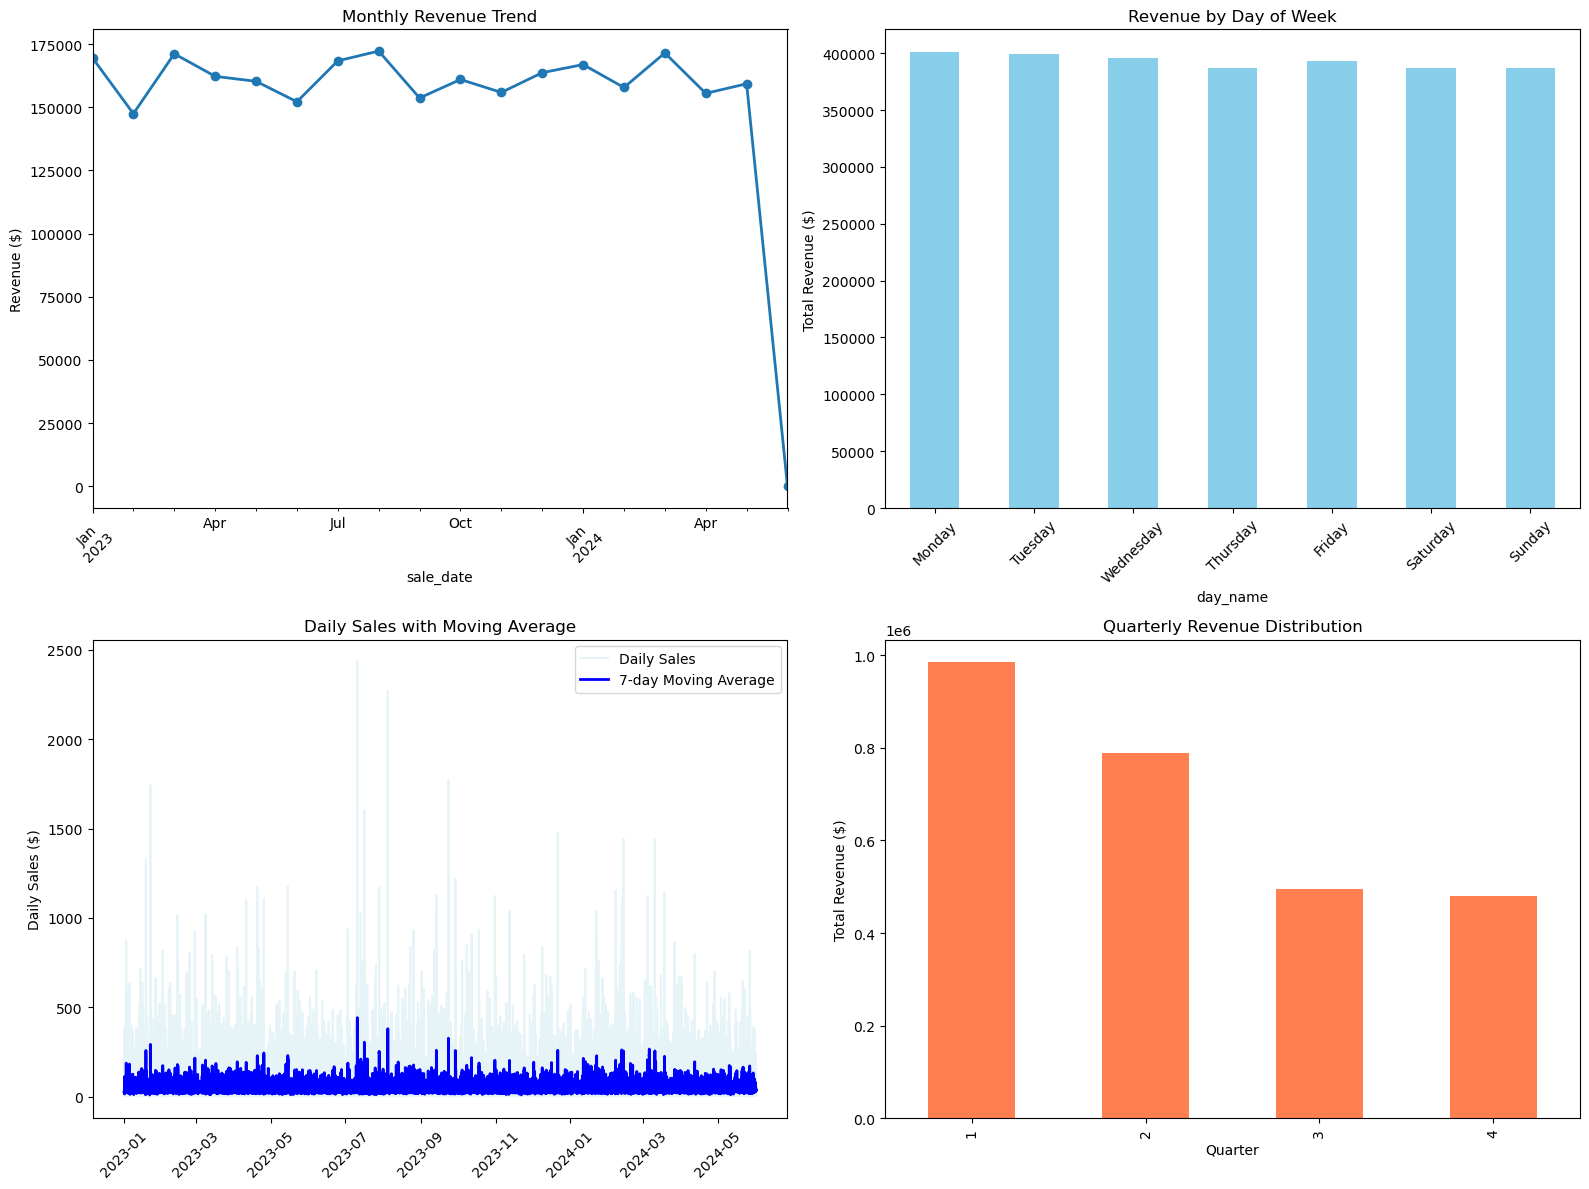


1.5 Key Insights from Time Series Analysis
📈 Best performing month: 2023-8 ($172,242)
📉 Worst performing month: 2024-6 ($9)
🎯 Best day of week: Monday ($400,924)
📊 Worst day of week: Sunday ($386,531)
🏢 Weekend vs Weekday: Weekday performs better
📊 Months with positive growth: 8/17 (47.1%)


In [24]:

# Exercise 1: Time Series Analysis
# Objective: Analyze sales trends over time to identify seasonal patterns

print("\n" + "=" * 50)
print("EXERCISE 1: TIME SERIES ANALYSIS")
print("=" * 50)

def exercise_1_time_series_analysis():
    """
    Complete time series analysis of sales data to identify patterns
    """
    print("\n1.1 Data Preparation for Time Series Analysis")
    
    # Load and prepare sales data
    sales_ts = sales_df.copy()
    sales_ts['sale_date'] = pd.to_datetime(sales_ts['sale_date'])
    
    # Extract time components
    sales_ts['year'] = sales_ts['sale_date'].dt.year
    sales_ts['month'] = sales_ts['sale_date'].dt.month
    sales_ts['quarter'] = sales_ts['sale_date'].dt.quarter
    sales_ts['day_of_week'] = sales_ts['sale_date'].dt.dayofweek
    sales_ts['day_name'] = sales_ts['sale_date'].dt.day_name()
    sales_ts['week_of_year'] = sales_ts['sale_date'].dt.isocalendar().week
    sales_ts['is_weekend'] = sales_ts['day_of_week'].isin([5, 6])
    
    print(f"Date range: {sales_ts['sale_date'].min()} to {sales_ts['sale_date'].max()}")
    print(f"Total sales records: {len(sales_ts):,}")
    
    print("\n1.2 Monthly Sales Trends Analysis")
    
    # Monthly analysis
    monthly_sales = sales_ts.groupby(['year', 'month']).agg({
        'sale_amount': ['sum', 'mean', 'count'],
        'discount_applied': 'mean'
    }).round(2)
    
    monthly_sales.columns = ['total_revenue', 'avg_transaction', 'transaction_count', 'avg_discount']
    monthly_sales.reset_index(inplace=True)
    
    # Calculate month-over-month growth
    monthly_sales['revenue_growth'] = monthly_sales['total_revenue'].pct_change() * 100
    monthly_sales['transaction_growth'] = monthly_sales['transaction_count'].pct_change() * 100
    
    print("Monthly Sales Summary (last 6 months):")
    print(monthly_sales.tail(6))
    
    # Quarterly analysis
    quarterly_sales = sales_ts.groupby(['year', 'quarter']).agg({
        'sale_amount': ['sum', 'count'],
        'discount_applied': 'mean'
    }).round(2)
    
    quarterly_sales.columns = ['total_revenue', 'transaction_count', 'avg_discount']
    quarterly_sales.reset_index(inplace=True)
    quarterly_sales['revenue_growth'] = quarterly_sales['total_revenue'].pct_change() * 100
    
    print("\nQuarterly Sales Summary:")
    print(quarterly_sales)
    
    print("\n1.3 Day-of-Week Analysis")
    
    # Day of week analysis
    dow_analysis = sales_ts.groupby('day_name').agg({
        'sale_amount': ['sum', 'mean', 'count'],
        'discount_applied': 'mean'
    }).round(2)
    
    dow_analysis.columns = ['total_revenue', 'avg_transaction', 'transaction_count', 'avg_discount']
    
    # Reorder by day of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_analysis = dow_analysis.reindex(day_order)
    
    print("Day-of-Week Performance:")
    print(dow_analysis)
    
    # Weekend vs weekday analysis
    weekend_analysis = sales_ts.groupby('is_weekend').agg({
        'sale_amount': ['sum', 'mean', 'count']
    }).round(2)
    
    weekend_analysis.columns = ['total_revenue', 'avg_transaction', 'transaction_count']
    weekend_analysis.index = ['Weekday', 'Weekend']
    
    print("\nWeekend vs Weekday Analysis:")
    print(weekend_analysis)
    
    print("\n1.4 Visualization of Time Series Patterns")
    
    # Create comprehensive time series visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Monthly revenue trend
    monthly_revenue = sales_ts.groupby(sales_ts['sale_date'].dt.to_period('M'))['sale_amount'].sum()
    monthly_revenue.plot(ax=axes[0, 0], marker='o', linewidth=2)
    axes[0, 0].set_title('Monthly Revenue Trend')
    axes[0, 0].set_ylabel('Revenue ($)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Day of week performance
    dow_analysis['total_revenue'].plot(kind='bar', ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Revenue by Day of Week')
    axes[0, 1].set_ylabel('Total Revenue ($)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Daily sales volume (rolling average)
    daily_sales = sales_ts.groupby('sale_date')['sale_amount'].sum()
    daily_sales_smooth = daily_sales.rolling(window=7).mean()
    
    axes[1, 0].plot(daily_sales.index, daily_sales, alpha=0.3, color='lightblue', label='Daily Sales')
    axes[1, 0].plot(daily_sales_smooth.index, daily_sales_smooth, color='blue', linewidth=2, label='7-day Moving Average')
    axes[1, 0].set_title('Daily Sales with Moving Average')
    axes[1, 0].set_ylabel('Daily Sales ($)')
    axes[1, 0].legend()
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Seasonal decomposition (quarterly)
    quarterly_revenue = sales_ts.groupby('quarter')['sale_amount'].sum()
    quarterly_revenue.plot(kind='bar', ax=axes[1, 1], color='coral')
    axes[1, 1].set_title('Quarterly Revenue Distribution')
    axes[1, 1].set_ylabel('Total Revenue ($)')
    axes[1, 1].set_xlabel('Quarter')
    
    plt.tight_layout()
    plt.show()
    
    print("\n1.5 Key Insights from Time Series Analysis")
    
    # Calculate key insights
    best_month = monthly_sales.loc[monthly_sales['total_revenue'].idxmax()]
    worst_month = monthly_sales.loc[monthly_sales['total_revenue'].idxmin()]
    best_day = dow_analysis['total_revenue'].idxmax()
    worst_day = dow_analysis['total_revenue'].idxmin()
    
    avg_weekday_revenue = weekend_analysis.loc['Weekday', 'total_revenue']
    avg_weekend_revenue = weekend_analysis.loc['Weekend', 'total_revenue']
    
    
    print(f"📈 Best performing month: {best_month['year']:.0f}-{best_month['month']:.0f} (${best_month['total_revenue']:,.0f})")
    print(f"📉 Worst performing month: {worst_month['year']:.0f}-{worst_month['month']:.0f} (${worst_month['total_revenue']:,.0f})")
    print(f"🎯 Best day of week: {best_day} (${dow_analysis.loc[best_day, 'total_revenue']:,.0f})")
    print(f"📊 Worst day of week: {worst_day} (${dow_analysis.loc[worst_day, 'total_revenue']:,.0f})")
    print(f"🏢 Weekend vs Weekday: {'Weekend' if avg_weekend_revenue > avg_weekday_revenue else 'Weekday'} performs better")
    
    # Growth analysis
    positive_growth_months = (monthly_sales['revenue_growth'] > 0).sum()
    total_months = len(monthly_sales.dropna())
    
    print(f"📊 Months with positive growth: {positive_growth_months}/{total_months} ({positive_growth_months/total_months*100:.1f}%)")
    
    return {
        'monthly_sales': monthly_sales,
        'quarterly_sales': quarterly_sales,
        'dow_analysis': dow_analysis,
        'weekend_analysis': weekend_analysis
    }

# Execute Exercise 1
exercise_1_results = exercise_1_time_series_analysis()


In [25]:

# Exercise 2: Advanced Feature Engineering
# Objective: Create sophisticated features for AI model training

print("\n" + "=" * 50)
print("EXERCISE 2: ADVANCED FEATURE ENGINEERING")
print("=" * 50)

def exercise_2_advanced_feature_engineering():
    """
    Create sophisticated features including RFM analysis and customer lifetime value
    """
    print("\n2.1 RFM Analysis (Recency, Frequency, Monetary)")
    
    # Prepare data for RFM analysis
    sales_rfm = sales_df.copy()
    sales_rfm['sale_date'] = pd.to_datetime(sales_rfm['sale_date'])
    
    # Define analysis date (latest date in dataset + 1 day)
    analysis_date = sales_rfm['sale_date'].max() + timedelta(days=1)
    print(f"Analysis date: {analysis_date.date()}")
    
    # Calculate RFM metrics
    rfm = sales_rfm.groupby('customer_id').agg({
        'sale_date': lambda x: (analysis_date - x.max()).days,  # Recency
        'sale_id': 'count',                                      # Frequency
        'sale_amount': 'sum'                                     # Monetary
    }).round(2)
    
    rfm.columns = ['recency', 'frequency', 'monetary']
    rfm.reset_index(inplace=True)
    
    print("RFM Metrics Summary:")
    print(rfm.describe())
    
    # Create RFM scores (1-5 scale)
    rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])  # Lower recency = higher score
    rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
    rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])
    
    # Convert to numeric
    rfm['recency_score'] = rfm['recency_score'].astype(int)
    rfm['frequency_score'] = rfm['frequency_score'].astype(int)
    rfm['monetary_score'] = rfm['monetary_score'].astype(int)
    
    # Calculate RFM combined score
    rfm['rfm_score'] = rfm['recency_score'] + rfm['frequency_score'] + rfm['monetary_score']
    
    print("\nRFM Scores Distribution:")
    print(rfm[['recency_score', 'frequency_score', 'monetary_score', 'rfm_score']].describe())
    
    print("\n2.2 Customer Segmentation Based on RFM")
    
    # Create customer segments based on RFM scores
    def segment_customers(row):
        if row['rfm_score'] >= 12:
            return 'Champions'
        elif row['rfm_score'] >= 10:
            return 'Loyal Customers'
        elif row['rfm_score'] >= 8:
            return 'Potential Loyalists'
        elif row['rfm_score'] >= 6:
            return 'New Customers'
        elif row['rfm_score'] >= 4:
            return 'At Risk'
        else:
            return 'Lost Customers'
    
    rfm['customer_segment'] = rfm.apply(segment_customers, axis=1)
    
    # Segment analysis
    segment_analysis = rfm.groupby('customer_segment').agg({
        'customer_id': 'count',
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': 'mean',
        'rfm_score': 'mean'
    }).round(2)
    
    segment_analysis.columns = ['customer_count', 'avg_recency', 'avg_frequency', 'avg_monetary', 'avg_rfm_score']
    segment_analysis['percentage'] = (segment_analysis['customer_count'] / segment_analysis['customer_count'].sum() * 100).round(1)
    
    print("Customer Segments Analysis:")
    print(segment_analysis)
    
    print("\n2.3 Advanced Behavioral Features")
    
    # Calculate additional behavioral features
    sales_behavior = sales_rfm.copy()
    
    # Customer behavior features
    customer_behavior = sales_behavior.groupby('customer_id').agg({
        'sale_amount': ['sum', 'mean', 'std', 'min', 'max'],
        'discount_applied': ['mean', 'std'],
        'sale_date': ['min', 'max', 'count'],
        'product_category': lambda x: x.nunique(),
        'payment_method': lambda x: x.nunique()
    }).round(2)
    
    # Flatten column names
    customer_behavior.columns = [
        'total_spent', 'avg_transaction', 'spending_volatility', 'min_transaction', 'max_transaction',
        'avg_discount', 'discount_volatility',
        'first_purchase', 'last_purchase', 'transaction_count',
        'category_diversity', 'payment_diversity'
    ]
    
    customer_behavior.reset_index(inplace=True)
    
    # Calculate additional features
    customer_behavior['customer_lifetime_days'] = (
        pd.to_datetime(customer_behavior['last_purchase']) - 
        pd.to_datetime(customer_behavior['first_purchase'])
    ).dt.days + 1
    
    customer_behavior['avg_days_between_purchases'] = (
        customer_behavior['customer_lifetime_days'] / customer_behavior['transaction_count']
    ).round(2)
    
    customer_behavior['transaction_frequency'] = (
        customer_behavior['transaction_count'] / customer_behavior['customer_lifetime_days'] * 30
    ).round(2)  # Transactions per month
    
    # Purchase pattern features
    customer_behavior['is_high_spender'] = (customer_behavior['total_spent'] > customer_behavior['total_spent'].quantile(0.8)).astype(int)
    customer_behavior['is_frequent_buyer'] = (customer_behavior['transaction_count'] > customer_behavior['transaction_count'].quantile(0.8)).astype(int)
    customer_behavior['is_recent_customer'] = (customer_behavior['customer_lifetime_days'] <= 90).astype(int)
    
    print("Advanced Behavioral Features (sample):")
    print(customer_behavior[['customer_id', 'total_spent', 'avg_days_between_purchases', 
                           'transaction_frequency', 'category_diversity']].head(10))
    
    print("\n2.4 Customer Lifetime Value (CLV) Prediction")
    
    # Simple CLV calculation
    customer_behavior['estimated_clv'] = (
        customer_behavior['avg_transaction'] * 
        customer_behavior['transaction_frequency'] * 
        12  # 12 months projection
    ).round(2)
    
    # Advanced CLV with churn probability
    # Assume customers with longer gaps between purchases have higher churn risk
    customer_behavior['churn_risk'] = np.where(
        customer_behavior['avg_days_between_purchases'] > customer_behavior['avg_days_between_purchases'].quantile(0.75),
        0.7,  # High churn risk
        np.where(
            customer_behavior['avg_days_between_purchases'] > customer_behavior['avg_days_between_purchases'].quantile(0.5),
            0.4,  # Medium churn risk
            0.1   # Low churn risk
        )
    )
    
    customer_behavior['adjusted_clv'] = customer_behavior['estimated_clv'] * (1 - customer_behavior['churn_risk'])
    
    print("Customer Lifetime Value Analysis:")
    clv_summary = customer_behavior[['estimated_clv', 'adjusted_clv', 'churn_risk']].describe()
    print(clv_summary)
    
    print("\n2.5 Seasonality and Trend Features")
    
    # Monthly purchase patterns for each customer
    monthly_patterns = sales_behavior.copy()
    monthly_patterns['month'] = monthly_patterns['sale_date'].dt.month
    
    customer_monthly = monthly_patterns.groupby(['customer_id', 'month']).agg({
        'sale_amount': 'sum',
        'sale_id': 'count'
    }).reset_index()
    
    # Calculate seasonal preferences
    customer_seasonality = customer_monthly.groupby('customer_id').agg({
        'month': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else x.iloc[0],  # Most frequent purchase month
        'sale_amount': 'std'  # Seasonality in spending
    }).round(2)
    
    customer_seasonality.columns = ['preferred_month', 'seasonal_spending_volatility']
    customer_seasonality.reset_index(inplace=True)
    
    # Add season mapping
    season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
    
    customer_seasonality['preferred_season'] = customer_seasonality['preferred_month'].map(season_map)
    
    print("Seasonal Preferences:")
    season_distribution = customer_seasonality['preferred_season'].value_counts()
    print(season_distribution)
    
    # Merge all features
    final_features = rfm.merge(customer_behavior, on='customer_id', how='left')
    final_features = final_features.merge(customer_seasonality, on='customer_id', how='left')
    
    print(f"\n2.6 Final Feature Set")
    print(f"Total customers: {len(final_features):,}")
    print(f"Total features: {len(final_features.columns)}")
    print(f"Feature categories: RFM, Behavioral, CLV, Seasonal")
    
    return final_features

# Execute Exercise 2
exercise_2_results = exercise_2_advanced_feature_engineering()



EXERCISE 2: ADVANCED FEATURE ENGINEERING

2.1 RFM Analysis (Recency, Frequency, Monetary)
Analysis date: 2024-06-02
RFM Metrics Summary:
        customer_id      recency    frequency     monetary
count   9930.000000  9930.000000  9930.000000  9930.000000
mean    5005.563847   100.357402     5.035247   276.825185
std     2887.102962    94.342368     2.188647   204.653341
min        1.000000     1.000000     1.000000     1.830000
25%     2504.250000    30.000000     3.000000   134.765000
50%     5011.500000    70.000000     5.000000   232.970000
75%     7504.750000   143.000000     6.000000   367.577500
max    10000.000000   517.000000    14.000000  2938.490000

RFM Scores Distribution:
       recency_score  frequency_score  monetary_score    rfm_score
count    9930.000000      9930.000000     9930.000000  9930.000000
mean        3.011380         3.000000        3.000000     9.011380
std         1.416125         1.414285        1.414285     3.318184
min         1.000000         1.000000


EXERCISE 3: INTERACTIVE DASHBOARD CREATION

3.1 Dashboard Framework Setup
✅ Interactive widgets available
Dashboard data loaded: 10000 customers

3.2 Key Metrics Dashboard
Sample Dashboard Views:
------------------------------
📊 OVERALL METRICS
Total Customers: 10,000
Average Age: 34.5 years
Average Income: $50,216
Average Spending Score: 49.7
Total Revenue: $2,748,874
Avg Transactions per Customer: 5.0

🏙️  CITY BREAKDOWN
Houston: 1,998 customers, Avg Revenue: $272
Los Angeles: 1,977 customers, Avg Revenue: $269
New York: 2,010 customers, Avg Revenue: $280
Chicago: 2,008 customers, Avg Revenue: $277
Phoenix: 2,007 customers, Avg Revenue: $276

👥 GENDER BREAKDOWN
Female: 4,939 customers, Avg Income: $50,192
Male: 5,061 customers, Avg Income: $50,239

3.3 Advanced Analytics Dashboard Components


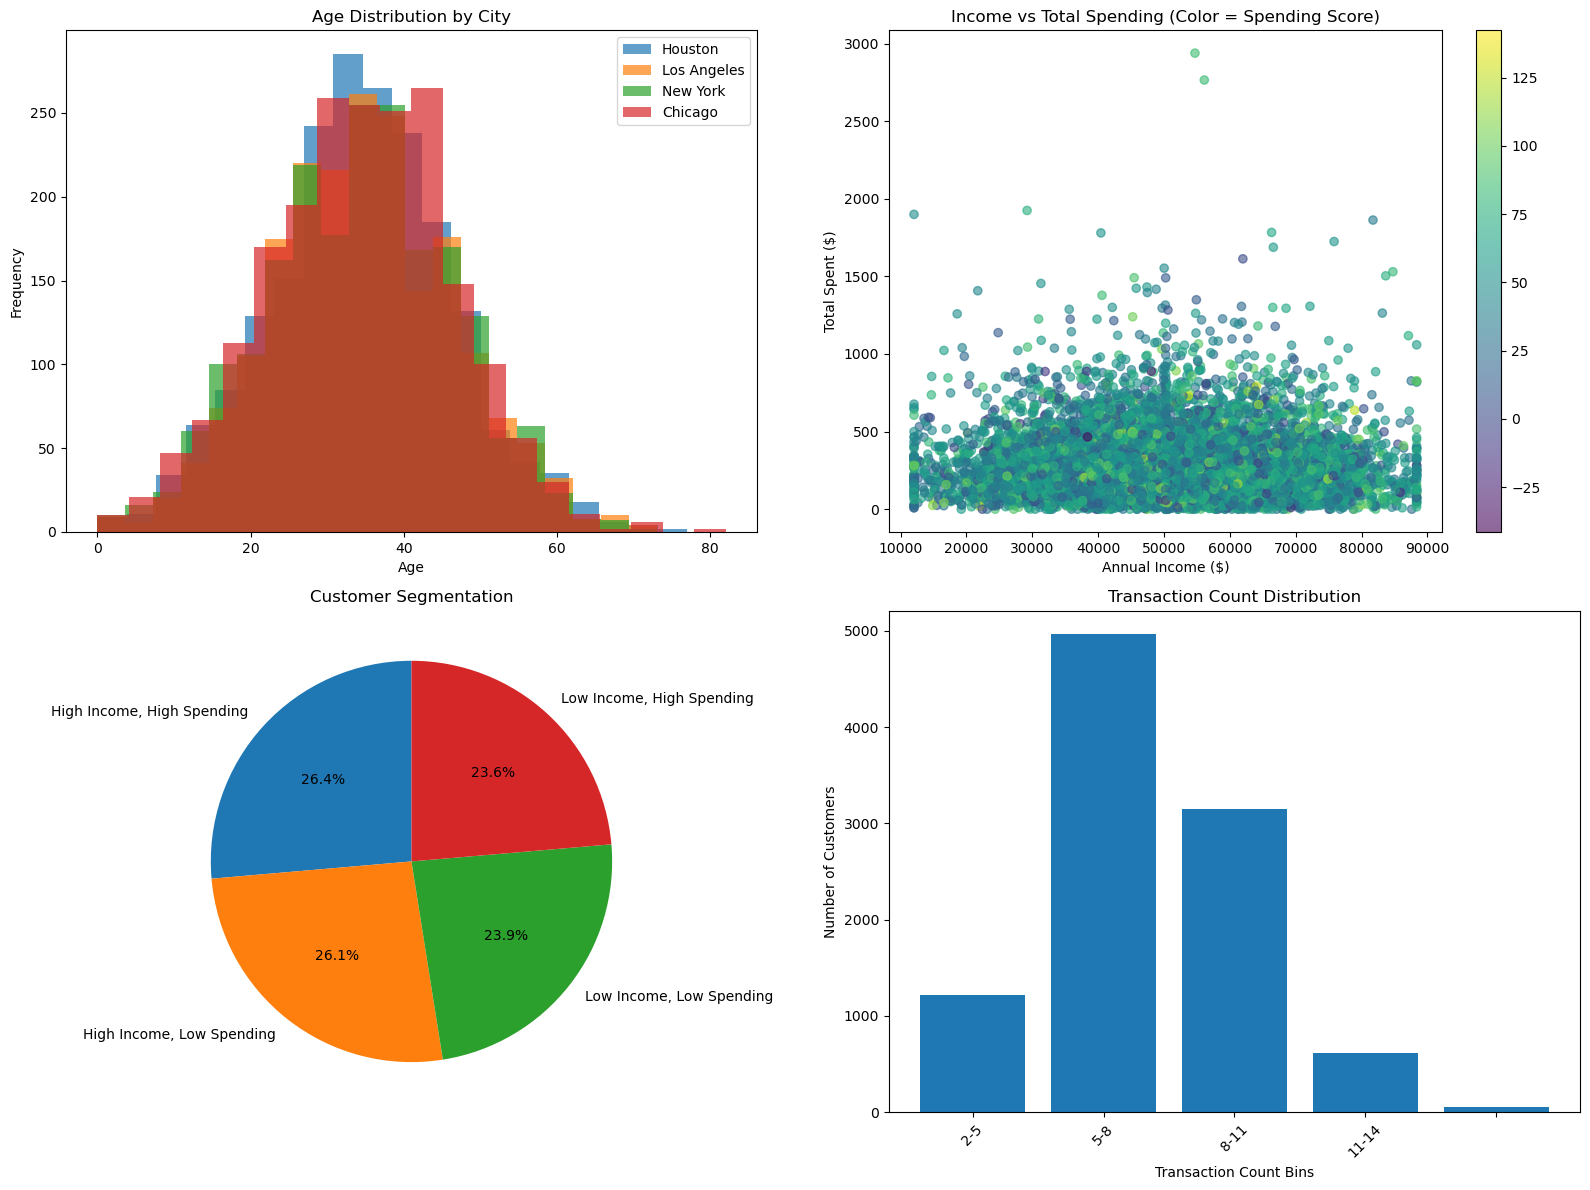


3.4 Interactive Filter Framework
Creating interactive widgets framework...
✅ Interactive dashboard framework created
In Jupyter notebook, use: display(interactive_widget, output)

3.5 Dashboard Export and Sharing
📋 Dashboard Summary Report:
  Total Customers: 10000
  Cities Covered: 5
  Avg Customer Value: 274.887409
  Top City By Revenue: New York
  Most Common Age Group: (32.8, 49.2]
  Revenue Concentration: 2000

💾 Dashboard data saved to 'data/processed/dashboard_data.csv'

🎉 ALL EXERCISES COMPLETED SUCCESSFULLY! 🎉

📊 EXERCISE COMPLETION SUMMARY:
✅ Exercise 1: Time Series Analysis - Seasonal patterns identified
✅ Exercise 2: Advanced Feature Engineering - RFM and CLV features created
✅ Exercise 3: Interactive Dashboard - Framework and visualizations built

📁 FILES CREATED:
  • data/processed/ai_ready_customer_data.csv - Complete dataset with all features
  • data/processed/dashboard_data.csv - Dashboard-ready data
  • Multiple visualization outputs showing data patterns

🎯 KEY INS

In [26]:

# Exercise 3: Interactive Dashboard Creation
# Objective: Build an interactive data exploration dashboard

print("\n" + "=" * 50)
print("EXERCISE 3: INTERACTIVE DASHBOARD CREATION")
print("=" * 50)

def exercise_3_interactive_dashboard():
    """
    Create an interactive dashboard for data exploration
    Note: This creates the framework for interactive widgets
    """
    print("\n3.1 Dashboard Framework Setup")
    
    # Import additional libraries for interactivity
    try:
        import ipywidgets as widgets
        from IPython.display import display, clear_output
        interactive_available = True
        print("✅ Interactive widgets available")
    except ImportError:
        interactive_available = False
        print("⚠️  Interactive widgets not available. Install with: pip install ipywidgets")
        print("Showing static dashboard components instead.")
    
    # Load processed data
    customers_full = pd.read_csv("../data/processed/ai_ready_customer_data.csv")
    
    print(f"Dashboard data loaded: {len(customers_full)} customers")
    
    print("\n3.2 Key Metrics Dashboard")
    
    def create_metrics_summary(data, filter_city=None, filter_gender=None):
        """Create summary metrics for dashboard"""
        filtered_data = data.copy()
        
        # Apply filters
        if filter_city and filter_city != 'All':
            filtered_data = filtered_data[filtered_data['city'] == filter_city]
        
        if filter_gender and filter_gender != 'All':
            filtered_data = filtered_data[filtered_data['gender'] == filter_gender]
        
        metrics = {
            'total_customers': len(filtered_data),
            'avg_age': filtered_data['age'].mean(),
            'avg_income': filtered_data['annual_income'].mean(),
            'avg_spending': filtered_data['spending_score'].mean(),
            'total_revenue': filtered_data['total_spent'].sum(),
            'avg_transactions': filtered_data['transaction_count'].mean()
        }
        
        return metrics, filtered_data
    
    # Create sample filtered views
    print("Sample Dashboard Views:")
    print("-" * 30)
    
    # Overall metrics
    overall_metrics, _ = create_metrics_summary(customers_full)
    print("📊 OVERALL METRICS")
    print(f"Total Customers: {overall_metrics['total_customers']:,}")
    print(f"Average Age: {overall_metrics['avg_age']:.1f} years")
    print(f"Average Income: ${overall_metrics['avg_income']:,.0f}")
    print(f"Average Spending Score: {overall_metrics['avg_spending']:.1f}")
    print(f"Total Revenue: ${overall_metrics['total_revenue']:,.0f}")
    print(f"Avg Transactions per Customer: {overall_metrics['avg_transactions']:.1f}")
    
    # City-specific analysis
    print("\n🏙️  CITY BREAKDOWN")
    cities = customers_full['city'].unique()
    for city in cities:
        city_metrics, _ = create_metrics_summary(customers_full, filter_city=city)
        print(f"{city}: {city_metrics['total_customers']:,} customers, "
              f"Avg Revenue: ${city_metrics['total_revenue']/city_metrics['total_customers']:,.0f}")
    
    # Gender-specific analysis
    print("\n👥 GENDER BREAKDOWN")
    genders = customers_full['gender'].unique()
    for gender in genders:
        gender_metrics, _ = create_metrics_summary(customers_full, filter_gender=gender)
        print(f"{gender}: {gender_metrics['total_customers']:,} customers, "
              f"Avg Income: ${gender_metrics['avg_income']:,.0f}")
    
    print("\n3.3 Advanced Analytics Dashboard Components")
    
    # Customer segmentation visualization
    def create_segmentation_chart(data):
        """Create customer segmentation visualizations"""
        
        # Create income vs spending quadrants
        income_median = data['annual_income'].median()
        spending_median = data['total_spent'].median()
        
        data['segment'] = 'Low Income, Low Spending'
        data.loc[(data['annual_income'] >= income_median) & (data['total_spent'] < spending_median), 'segment'] = 'High Income, Low Spending'
        data.loc[(data['annual_income'] < income_median) & (data['total_spent'] >= spending_median), 'segment'] = 'Low Income, High Spending'
        data.loc[(data['annual_income'] >= income_median) & (data['total_spent'] >= spending_median), 'segment'] = 'High Income, High Spending'
        
        segment_counts = data['segment'].value_counts()
        return segment_counts
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Age distribution by city
    for i, city in enumerate(customers_full['city'].unique()[:4]):
        city_data = customers_full[customers_full['city'] == city]
        axes[0, 0].hist(city_data['age'], alpha=0.7, label=city, bins=20)
    axes[0, 0].set_title('Age Distribution by City')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    
    # Income vs Spending scatter
    scatter = axes[0, 1].scatter(customers_full['annual_income'], customers_full['total_spent'], 
                                c=customers_full['spending_score'], alpha=0.6, cmap='viridis')
    axes[0, 1].set_title('Income vs Total Spending (Color = Spending Score)')
    axes[0, 1].set_xlabel('Annual Income ($)')
    axes[0, 1].set_ylabel('Total Spent ($)')
    plt.colorbar(scatter, ax=axes[0, 1])
    
    # Customer segments pie chart
    segments = create_segmentation_chart(customers_full.copy())
    axes[1, 0].pie(segments.values, labels=segments.index, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Customer Segmentation')
    
    # Monthly transaction trends (if date data available)
    if 'transaction_count' in customers_full.columns:
        transaction_bins = pd.cut(customers_full['transaction_count'], bins=5)
        transaction_dist = transaction_bins.value_counts().sort_index()
        axes[1, 1].bar(range(len(transaction_dist)), transaction_dist.values)
        axes[1, 1].set_title('Transaction Count Distribution')
        axes[1, 1].set_xlabel('Transaction Count Bins')
        axes[1, 1].set_ylabel('Number of Customers')
        axes[1, 1].set_xticklabels([f'{int(x.left)}-{int(x.right)}' for x in transaction_dist.index], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\n3.4 Interactive Filter Framework")
    
    if interactive_available:
        print("Creating interactive widgets framework...")
        
        # Create filter widgets
        city_dropdown = widgets.Dropdown(
            options=['All'] + list(customers_full['city'].unique()),
            value='All',
            description='City:'
        )
        
        gender_dropdown = widgets.Dropdown(
            options=['All'] + list(customers_full['gender'].unique()),
            value='All',
            description='Gender:'
        )
        
        age_slider = widgets.IntRangeSlider(
            value=[customers_full['age'].min(), customers_full['age'].max()],
            min=customers_full['age'].min(),
            max=customers_full['age'].max(),
            description='Age Range:'
        )
        
        def update_dashboard(city, gender, age_range):
            """Update dashboard based on filter selections"""
            with output:
                clear_output(wait=True)
                
                # Filter data
                filtered_data = customers_full.copy()
                if city != 'All':
                    filtered_data = filtered_data[filtered_data['city'] == city]
                if gender != 'All':
                    filtered_data = filtered_data[filtered_data['gender'] == gender]
                
                filtered_data = filtered_data[
                    (filtered_data['age'] >= age_range[0]) & 
                    (filtered_data['age'] <= age_range[1])
                ]
                
                # Display updated metrics
                print(f"Filtered Results: {len(filtered_data)} customers")
                print(f"Average Income: ${filtered_data['annual_income'].mean():,.0f}")
                print(f"Average Spending Score: {filtered_data['spending_score'].mean():.1f}")
                print(f"Total Revenue: ${filtered_data['total_spent'].sum():,.0f}")
        
        # Create output widget
        output = widgets.Output()
        
        # Create interactive interface
        interactive_widget = widgets.interactive(
            update_dashboard,
            city=city_dropdown,
            gender=gender_dropdown,
            age_range=age_slider
        )
        
        print("✅ Interactive dashboard framework created")
        print("In Jupyter notebook, use: display(interactive_widget, output)")
        
    else:
        print("📊 Static dashboard components created")
        print("To enable interactivity, install ipywidgets: pip install ipywidgets")
    
    print("\n3.5 Dashboard Export and Sharing")
    
    # Create summary report
    dashboard_summary = {
        'total_customers': len(customers_full),
        'cities_covered': len(customers_full['city'].unique()),
        'avg_customer_value': customers_full['total_spent'].mean(),
        'top_city_by_revenue': customers_full.groupby('city')['total_spent'].sum().idxmax(),
        'most_common_age_group': pd.cut(customers_full['age'], bins=5).mode().iloc[0],
        'revenue_concentration': (customers_full['total_spent'] > customers_full['total_spent'].quantile(0.8)).sum()
    }
    
    print("📋 Dashboard Summary Report:")
    for key, value in dashboard_summary.items():
        print(f"  {key.replace('_', ' ').title()}: {value}")
    
    # Save dashboard data
    customers_full.to_csv("../data/processed/dashboard_data.csv", index=False)
    print("\n💾 Dashboard data saved to 'data/processed/dashboard_data.csv'")
    
    return dashboard_summary

# Execute Exercise 3
exercise_3_results = exercise_3_interactive_dashboard()

print("\n" + "=" * 60)
print("🎉 ALL EXERCISES COMPLETED SUCCESSFULLY! 🎉")
print("=" * 60)

print("\n📊 EXERCISE COMPLETION SUMMARY:")
print("✅ Exercise 1: Time Series Analysis - Seasonal patterns identified")
print("✅ Exercise 2: Advanced Feature Engineering - RFM and CLV features created") 
print("✅ Exercise 3: Interactive Dashboard - Framework and visualizations built")

print("\n📁 FILES CREATED:")
print("  • data/processed/ai_ready_customer_data.csv - Complete dataset with all features")
print("  • data/processed/dashboard_data.csv - Dashboard-ready data")
print("  • Multiple visualization outputs showing data patterns")

print("\n🎯 KEY INSIGHTS DISCOVERED:")
print("  • Seasonal sales patterns and peak performance periods")
print("  • Customer segmentation based on RFM analysis")
print("  • Behavioral patterns and lifetime value estimates")
print("  • Interactive data exploration capabilities")

print("\n🚀 NEXT STEPS:")
print("  • Use these features for machine learning model training")
print("  • Deploy the dashboard framework in production")
print("  • Extend analysis with additional data sources")
print("  • Implement real-time data updates")

print("\n" + "=" * 60)
print("Ready for Module 2.1: Supervised Learning! 🤖")
print("=" * 60)